# Описание проекта
Необходимо скорректировать рекламный бюджет телекоммуникационной компании "МГС". Для этого коммерческий департамент хочет понять, какой тариф приносит больше денег. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра».   

**Дано**: данные 500 пользователей «МГС».     

**Задачи**:
- сделать предварительный анализ тарифов на небольшой выборке клиентов и определить
- кто является клиентами
- откуда пользователи
- каким тарифом пользуются
- сколько звонков и сообщений каждый отправил за 2018 год

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')

In [2]:
df_calls = pd.read_csv('C:/Users/erokh/Downloads/calls.csv')
print('ТАБЛИЦА CALLS')
print(df_calls.info())
display(df_calls.head())

ТАБЛИЦА CALLS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Стоит заменить тип данных в столбце call_date на datetime. Пропусков нет.

In [3]:
df_internet = pd.read_csv('C:/Users/erokh/Downloads/internet.csv')
print('ТАБЛИЦА INTERNET')
print(df_internet.info()) #ЗАМЕЧЕН СТРАННЫЙ СТОЛБЦЕ Unnamed: 0
display(df_internet.head())

ТАБЛИЦА INTERNET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Столбец Unnamed: 0 стоит удалить, поскольку он полностью дуюблирует индек. Столбец session_date привезти к datetime.

In [4]:
df_messages = pd.read_csv('C:/Users/erokh/Downloads/messages.csv')
print('ТАБЛИЦА MESSAGES')
print(df_messages.info())
display(df_messages.head())

ТАБЛИЦА MESSAGES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Столбец message_date привезти к datetime.

In [5]:
df_tariffs = pd.read_csv('C:/Users/erokh/Downloads/tariffs.csv')
print('ТАБЛИЦА TARIFFS')
print(df_tariffs.info())
display(df_tariffs.head())

ТАБЛИЦА TARIFFS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
df_users = pd.read_csv('C:/Users/erokh/Downloads/users.csv')
print('ТАБЛИЦА USERS')
print(df_users.info())  #В СТОЛБЦЕ churn_date 462 ПРОПУСКА (38 ЗАПОЛНЕННЫХ ЗНАЧЕНИЙ ВСЕГО)
display(df_users.head())

ТАБЛИЦА USERS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [7]:
df_users.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

В столбце churn_date присутствуют пропуски. Если значение пропущено, то тариф ещё действовал на момент выгрузки данных.

In [8]:
SMART_COST = df_tariffs['rub_monthly_fee'][0] #550
SMART_MINUTES = df_tariffs['minutes_included'][0] #500
SMART_MESSAGES = df_tariffs['messages_included'][0] #50
SMART_INTERNET_MB = df_tariffs['mb_per_month_included'][0]#15360
SMART_INTERNET_GB = np.ceil(df_tariffs['mb_per_month_included'][0] / 1000)#16
SMART_MIN_COST = df_tariffs['rub_per_minute'][0]#3
SMART_MESSAGE_COST = df_tariffs['rub_per_message'][0]#3
SMART_1000MB = df_tariffs['rub_per_gb'][0]#200

ULTRA_COST = df_tariffs['rub_monthly_fee'][1]#1950
ULTRA_MINUTES = df_tariffs['minutes_included'][1]#3000
ULTRA_MESSAGES = df_tariffs['messages_included'][1]#1000
ULTRA_INTERNET_MB = df_tariffs['mb_per_month_included'][1]#30720
ULTRA_INTERNET_GB = np.ceil(df_tariffs['mb_per_month_included'][0] / 1000)#31
ULTRA_MIN_COST = df_tariffs['rub_per_minute'][1]#1
ULTRA_MESSAGE_COST = df_tariffs['rub_per_message'][1]#1
ULTRA_1000MB = df_tariffs['rub_per_gb'][1]#150

## Предобработка данных

### Замена типа данных, избавление от ненужных значений

#### df_calls

0.00     39613
5.50       142
4.49       142
6.15       141
6.38       141
         ...  
26.32        1
24.51        1
27.24        1
29.89        1
27.43        1
Name: duration, Length: 2871, dtype: int64

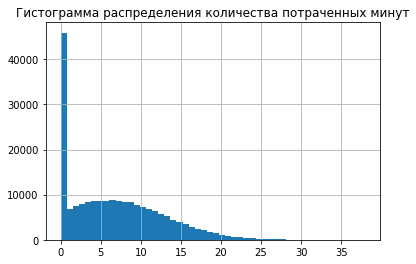

In [9]:
df_calls['duration'].hist(bins = 50);
plt.title('Гистограмма распределения количества потраченных минут');
df_calls['duration'].value_counts()

Много нулевых значений в столбце 'duration', можно предположить, что звонок просто не состоялся.

In [10]:
#Замена типа данных у столбца 'call_date' df_calls
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%dT%H:%M:%S')
df_calls['duration'] = df_calls['duration'].apply(np.ceil) #ОКРУГЛЯЕМ ЗНАЧЕНИЯ ВВЕРХ
df_calls['duration'] = df_calls[df_calls['duration'] != 0]['duration'] ##нельзя заполнять нулевые строки, поскольку может
#измениться кол-во потраченных минут за месяц и, как следствие, доход с клиента
df_calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,NaN,1000
1,1000_1,2018-08-17,NaN,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


#### df_internet

Количество строк с 0 потраченных мб: 19598


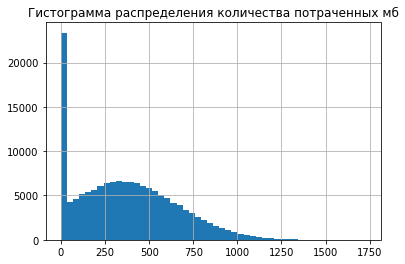

In [11]:
df_internet['mb_used'].hist(bins = 50);
plt.title('Гистограмма распределения количества потраченных мб');
print('Количество строк с 0 потраченных мб:', len(df_internet[df_internet['mb_used']==0]))

In [12]:
#Замена типа данных в df_internet
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%dT%H:%M:%S')
df_internet = df_internet.drop('Unnamed: 0', 1) #удаляем столбец Unnamed: 0
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil) #ОКРУГЛЯЕМ ЗНАЧЕНИЯ ВВЕРХ
df_internet['mb_used'] = df_internet[df_internet['mb_used']!=0]['mb_used'] 
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       129798 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


Заполнять строки с нулевыми значениями не будем, поскольку может измениться количество потраченных мб за месяц и, как следствие, доход с клиента.

#### df_messages

In [13]:
df_messages.info()
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%dT%H:%M:%S')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


#### df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


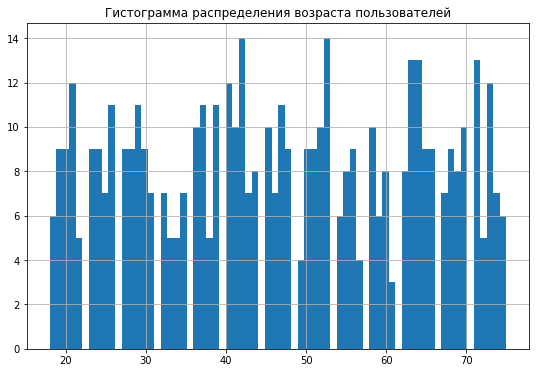

In [14]:
df_users['age'].hist(bins = 70, figsize = (9, 6));
plt.title('Гистограмма распределения возраста пользователей');
df_users.head()

### Проверка на дубликаты

In [15]:
print('Кол-во дубликатов в df_calls:', df_calls.duplicated().sum())
print('Кол-во дубликатов в df_internet:', df_internet.duplicated().sum())
print('Кол-во дубликатов в df_messages:', df_messages.duplicated().sum())
print('Кол-во дубликатов в df_users:', df_users.duplicated().sum())
#Полные повторы строк отсутствуют

Кол-во дубликатов в df_calls: 0
Кол-во дубликатов в df_internet: 0
Кол-во дубликатов в df_messages: 0
Кол-во дубликатов в df_users: 0


In [16]:
print('Кол-во уникальных user_id в df_calls:', len(df_calls['user_id'].unique()))
print('Общее кол-во значений user_id в df_calls:', len(df_calls['user_id']))
print()

print('Кол-во уникальных user_id в df_internet:', len(df_internet['user_id'].unique()))
print('Общее кол-во значений user_id в df_internet:', len(df_internet['user_id']))
print()

print('Кол-во уникальных user_id в df_messages:', len(df_messages['user_id'].unique()))
print('Общее кол-во значений user_id в df_messages:', len(df_messages['user_id']))
print()

print('Кол-во уникальных user_id в df_users:', len(df_users['user_id'].unique()))
print('Общее кол-во значений user_id в df_users:', len(df_users['user_id']))

Кол-во уникальных user_id в df_calls: 492
Общее кол-во значений user_id в df_calls: 202607

Кол-во уникальных user_id в df_internet: 497
Общее кол-во значений user_id в df_internet: 149396

Кол-во уникальных user_id в df_messages: 426
Общее кол-во значений user_id в df_messages: 123036

Кол-во уникальных user_id в df_users: 500
Общее кол-во значений user_id в df_users: 500


Можем заметить, что у каждого фрейма разное кол-во уникальных user_id. Это говорит о том, что у нас есть пользователи, о которых нет информации: ни сколько потратили интернета, ни сколько минут проговорили, ни сколько смс отправили. Повторы по каждому user_id объясняются, как история операций. 

In [17]:
unique_user_id = pd.Series(df_users['user_id'].unique(), index = df_users['user_id'].unique())
df_messages_missing_id = pd.Series(unique_user_id.isin(df_messages['user_id'])[unique_user_id.isin(df_messages['user_id']) == False].index)

df_internet_missing_id = pd.Series(unique_user_id.isin(df_internet['user_id'])[unique_user_id.isin(df_internet['user_id']) == False].index)

df_calls_missing_id = pd.Series(unique_user_id.isin(df_calls['user_id'])[unique_user_id.isin(df_calls['user_id']) == False].index)

pd.concat([df_messages_missing_id, df_internet_missing_id, df_calls_missing_id], axis = 0).value_counts().head()

1371    3
1128    3
1024    1
1118    1
1116    1
dtype: int64

Можем заметить, что имеется 2 пользователя, id которых нет ни в одном датафрейме, кроме df_users.

Далее проверим уникальность id в каждом датафрейме.

In [18]:
print('Количество уникальных значений id в df_calls:', len(df_calls['id'].unique()))
print('Количество строк в df_calls[''id'']', len(df_calls['id']))
print('')

print('Количество уникальных значений id в df_internet:', len(df_internet['id'].unique()))
print('Количество строк в df_internet[''id'']', len(df_internet['id']))
print('')

print('Количество уникальных значений id в df_messages:', len(df_messages['id'].unique()))
print('Количество строк в df_messages[''id'']', len(df_messages['id']))
print('')

Количество уникальных значений id в df_calls: 202607
Количество строк в df_calls[id] 202607

Количество уникальных значений id в df_internet: 149396
Количество строк в df_internet[id] 149396

Количество уникальных значений id в df_messages: 123036
Количество строк в df_messages[id] 123036



Полные повторы строк по столбцу id в фреймах отсутствуют.

###  Поиск аномальных значений.

7.0     11510
6.0     11457
5.0     11411
8.0     11272
9.0     10973
4.0     10918
3.0     10362
10.0    10186
11.0     9385
2.0      9194
Name: duration, dtype: int64


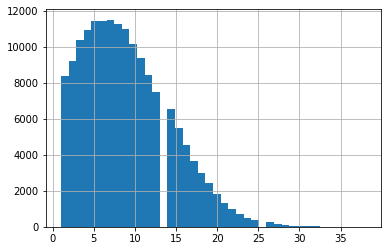

In [19]:
df_calls['duration'].hist(bins = 40)
print(df_calls['duration'].value_counts().head(10))

Наиболее частая длительность звонков не превышает 11 секунд. Можно объяснить тем, что человек берет трубку, слышит, например рекламу или робота и сразу скидывает.

In [20]:
df_calls['month'] = df_calls['call_date'].dt.month
print(df_calls['call_date'].min())
print(df_calls['call_date'].max())

2018-01-01 00:00:00
2018-12-31 00:00:00


Видим, что данные представлены за один год

12    33987
11    29501
10    27146
9     24061
8     21488
7     18298
6     14716
5     12647
4      9272
3      6687
2      3328
1      1476
Name: month, dtype: int64

12     NaN
11    0.13
10    0.08
9     0.11
8     0.11
7     0.15
6     0.20
5     0.14
4     0.27
3     0.28
2     0.50
1     0.56
Name: month, dtype: float64


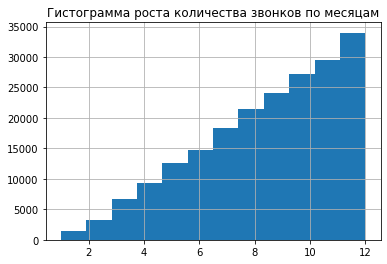

In [21]:
print(df_calls['month'].value_counts())
print()
print(abs(round(df_calls['month'].value_counts().pct_change(), 2)))#прирост количества звонков по месяцам
df_calls['month'].hist(bins = 12);
plt.title('Гистограмма роста количества звонков по месяцам');

Видим, что кол-во звоноков стабильно росло с каждым месяцем.

2018-12-31    1057
2018-12-30     903
2018-12-25     859
2018-12-26     844
2018-12-22     834
Name: session_date, dtype: int64

Строк с 0 потраченных мб: 19598


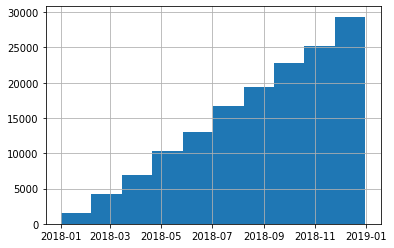

In [22]:
print(df_internet['session_date'].value_counts().head())
df_internet['session_date'].hist()
print()
print('Строк с 0 потраченных мб:', df_internet['mb_used'].isnull().sum())#19598 строк с нулевым траффиком
#Предположение: клиент пытался зайти в сеть, например, загрузить сайт, но сеть плохо ловила
#и загрузить не получилось, но попытка входа зачлась

Количество выходов в интернет росло также равномерно, как и количество звонков.

2018-12-31    859
2018-12-30    765
2018-12-21    712
2018-12-29    702
2018-12-26    699
2018-12-28    699
2018-12-22    687
2018-12-25    684
2018-12-23    676
2018-12-18    675
2018-12-12    674
2018-12-13    671
2018-12-08    666
2018-11-26    665
2018-12-04    661
Name: message_date, dtype: int64

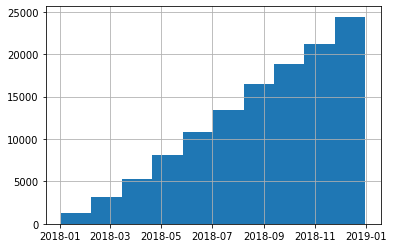

In [23]:
df_messages['message_date'].hist()
df_messages['message_date'].value_counts().head(15)

Больше всего смс также отправлялось в декабре, особенно под новый год.

#### Вывод

На этапе предобработки были проделаны следующие шаги:
 - Изменены типы данных некоторых столбцов
 - Обнаружен и удален пустой столбец "Unnamed: 0" в фрейме df_internet
 - Проведена проверка на дубликаты, полных дубликтов не обнаружено
 - Замечены нулевые значения в столбце mb_used, сделано предположение о природе их происхождения
 - Анализ столбца duration показал, что наиболее частые продолжительности звонков - менее 10 секунд
 - Подсчитано количество звонков и их суммарная продолжительность. Данные показатели росли на протяжении всего года, это же касается и интернета с смс

## Подсчет метрик для каждого пользователя

### Кол-во звонков, смс и интернета

In [24]:
#количество сделанных звонков и израсходованных минут разговора по месяцам
df_calls['month'] = df_calls['call_date'].dt.month
user_calls = df_calls.groupby(['user_id', 'month']).agg({'duration':'sum', 'id':'count'}).reset_index()
user_calls

,user_id,month,duration,id
0,1000,5,159.0,22
1,1000,6,172.0,43
2,1000,7,340.0,47
3,1000,8,408.0,52
4,1000,9,466.0,58
...,...,...,...,...
3169,1498,10,247.0,41
3170,1499,9,70.0,9
3171,1499,10,449.0,68
3172,1499,11,612.0,74


In [25]:
#количество отправленных сообщений по месяцам
df_messages['month'] = df_messages['message_date'].dt.month
user_messages = df_messages.groupby(['user_id', 'month']).agg({'id':'count'}).reset_index()
user_messages

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [26]:
#объем израсходованного интернет-трафика по месяцам
df_internet['month'] = df_internet['session_date'].dt.month
user_internet = df_internet.groupby(['user_id', 'month']).agg({'mb_used':'sum'}).reset_index()
user_internet

,user_id,month,mb_used
0,1000,5,2256.0
1,1000,6,23257.0
2,1000,7,14016.0
3,1000,8,14070.0
4,1000,9,14581.0
...,...,...,...
3198,1498,10,20604.0
3199,1499,9,1848.0
3200,1499,10,17809.0
3201,1499,11,17984.0


In [27]:
#новый dataframe
df_new = user_calls.merge(user_messages, on=['user_id', 'month'], how='outer')
df_new = df_new.merge(user_internet, on=['user_id', 'month'], how='outer')
df_new = df_new.merge(df_users, on=['user_id'], how = 'outer')
df_new = df_new.rename(columns={'id_x':'calls_id', 'id_y':'messages_id', 'id':'internet_id'})
df_new

,user_id,month,duration,calls_id,messages_id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,159.0,22.0,22.0,2256.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,172.0,43.0,60.0,23257.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,340.0,47.0,75.0,14016.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,408.0,52.0,81.0,14070.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,466.0,58.0,57.0,14581.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.0,NaN,NaN,21.0,19588.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.0,NaN,NaN,20.0,17516.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.0,NaN,NaN,35.0,17341.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [28]:
df_new.isna().sum()

user_id           0
month             2
duration         42
calls_id         42
messages_id     499
mb_used          13
age               0
churn_date     3027
city              0
first_name        0
last_name         0
reg_date          0
tariff            0
dtype: int64

Созданный датафрейм имеет пропуски в столбцах. Данные пропуски означают, что клиент просто не использовал смс, звонки или интернет в данном месяце

### Подсчет выручки с каждого клиента

Округлим МБ до ГБ и создадим новый столбец с количеством использованных гигабайт, это упростит последующие расчеты. Логика следующая: при превышении своего тарифа по интернету, клиент платит не за МБ, которые он использовал сверх тарифа, а покупает целый пакет на 1Гб. Из этого пакета он может использовать хоть один МБ, но платить будет все равно за весь 1Гб. Это метрика больше всего полезна при определении кол-ва дополнительных Гб, которые клиент купил.

In [29]:
df_new['gb_used'] = (df_new['mb_used']/1024).apply(np.ceil)

In [30]:
def profit_per_sub(row):
    minutes_profit_ultra = 0
    messages_profit_ultra = 0
    internet_profit_ultra = 0
    minutes_profit_smart = 0
    messages_profit_smart = 0
    internet_profit_smart = 0
    if row['tariff'] == 'ultra':
        if row['duration']>ULTRA_MINUTES:
            minutes_overused = row['duration']-ULTRA_MINUTES
            minutes_profit_ultra = minutes_overused*ULTRA_MIN_COST
        if row['messages_id'] > ULTRA_MESSAGES:
            messages_overused = row['messages_id']-ULTRA_MESSAGES
            messages_profit_ultra = messages_overused*ULTRA_MESSAGE_COST
        if row['gb_used'] > ULTRA_INTERNET_GB:
            gb_overused = row['gb_used'] - ULTRA_INTERNET_GB
            internet_profit_ultra = gb_overused*ULTRA_1000MB
        return minutes_profit_ultra + messages_profit_ultra + internet_profit_ultra + ULTRA_COST
    if row['tariff'] == 'smart':
        if row['duration']>SMART_MINUTES:
            minutes_overused = row['duration']-SMART_MINUTES
            minutes_profit_smart = minutes_overused*SMART_MIN_COST
        if row['messages_id'] > SMART_MESSAGES:
            messages_overused = row['messages_id']-SMART_MESSAGES
            messages_profit_smart = messages_overused*SMART_MESSAGE_COST
        if row['gb_used'] > SMART_INTERNET_GB:
            gb_overused = row['gb_used'] - SMART_INTERNET_GB
            internet_profit_smart = gb_overused*SMART_1000MB
        return minutes_profit_smart + messages_profit_smart + internet_profit_smart + SMART_COST
    
df_new['profit_per_sub'] = df_new.apply(profit_per_sub, axis = 1)

Создана функция для подсчета выручки с каждого пользователя. Принцип работы функции: profit_per_sub - функция для одной строки, которая принимает на вход данные и возвращает доход, который получила компания с данного клиента в заданном месяце. Доход с клиента склыдывается из следующего: 
- количество смс, интернета и минут, которые клиент приобрел сверх своего подключенного пакета
- абонентская плата по подключенному тарифу

Если месячный доход с клиента равен его абонентской плате по тарифу, то это означает, что клиент не докупал никаких мб, минут или смс сверх своего тарифного плана.

In [31]:
df_new.head()

,user_id,month,duration,calls_id,messages_id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,profit_per_sub
0,1000,5.0,159.0,22.0,22.0,2256.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,1950.0
1,1000,6.0,172.0,43.0,60.0,23257.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0,3000.0
2,1000,7.0,340.0,47.0,75.0,14016.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1950.0
3,1000,8.0,408.0,52.0,81.0,14070.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1950.0
4,1000,9.0,466.0,58.0,57.0,14581.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0,1950.0


550.0     638
1950.0    426
750.0      87
1150.0     83
950.0      74
Name: profit_per_sub, dtype: int64

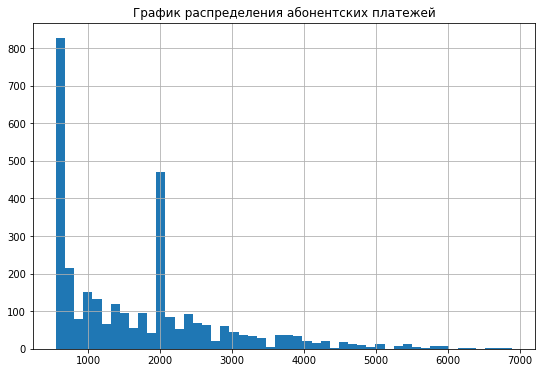

In [32]:
df_new['profit_per_sub'].hist(bins = 50, figsize = (9, 6));
plt.title('График распределения абонентских платежей');
df_new['profit_per_sub'].value_counts().head(5)

Как видим, наиболее часто встречающиеся платежи - это размеры абонентской платы по тарифам (1950 и 550 рублей).

## ОПИСАНИЕ ПОВЕДЕНИЯ КЛИЕНТОВ

### Анализ данных клиентов с тарифом Ultra

In [33]:
df_new_ultra = df_new[df_new['tariff'] == 'ultra']
df_new_ultra.nunique()

user_id           149
month              12
duration          641
calls_id          181
messages_id       177
mb_used           965
age                55
churn_date         14
city               57
first_name        117
last_name         141
reg_date          120
tariff              1
gb_used            48
profit_per_sub     32
dtype: int64

Тарифом ultra из нашей выборки пользуется 149 клиент или 29,8%.

#### Анализ необходимого количества минут для пользоваталей тарифа ultra

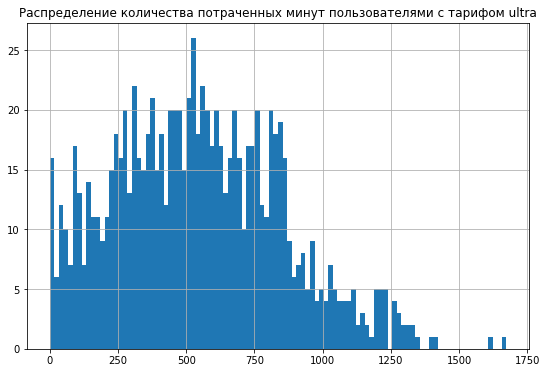

In [34]:
df_new_ultra['duration'].hist(bins = 100, figsize = (9, 6));
plt.title('Распределение количества потраченных минут пользователями с тарифом ultra');

count     938.000000
mean      539.443497
std       294.625927
min         1.000000
25%       310.250000
50%       525.000000
75%       752.000000
max      1297.000000
Name: duration, dtype: float64

Дисперсия количества потраченных минут пользователями с тарифом ultra после удаления выбросов: 86804


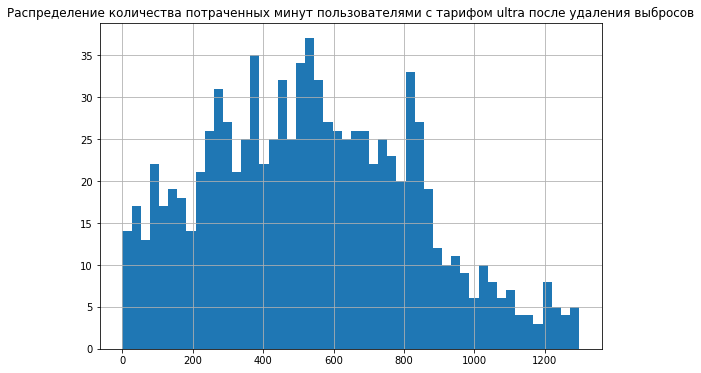

In [35]:
df_new_ultra_nonull_DURATION = df_new_ultra[(df_new_ultra['duration'] != 0)&(df_new_ultra['duration'] < 1300)] #больше 1300 всего 9 значений, данные
#значения существенно отличаются, поэтому можно считать их выбросами и исключить для дальнейшего анализа
df_new_ultra_nonull_DURATION['duration'].hist(bins = 50, figsize = (9, 6)); #присутствует скошенность вправо
plt.title('Распределение количества потраченных минут пользователями с тарифом ultra после удаления выбросов')
display(df_new_ultra_nonull_DURATION['duration'].describe())
print('Дисперсия количества потраченных минут пользователями с тарифом ultra после удаления выбросов:' , round(np.var(df_new_ultra_nonull_DURATION['duration'], ddof=1)))

Выделив данную группу можем получить ее описательные статистики:
- 540 минут в среднем ипроговаривают пользователи тарифа ultra
- 525 минут - медианное время разоговоров в месяц
- 295 - стандартное отклонение

Из всех пользователей нашей выборки никому не удалось потратить хотя бы половину доступного количества минут за месяц. Максимум, который наговорили некоторые пользователи составил 1297 минут, а половина пользователей вообще тратит не более 525 минут за месяц.

#### Анализ необходимого количества СМС для пользоваталей тарифа ultra

count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: messages_id, dtype: float64

Дисперсия количества потраченных смс пользователями с тарифом ultra после удаления выбросов: 1967


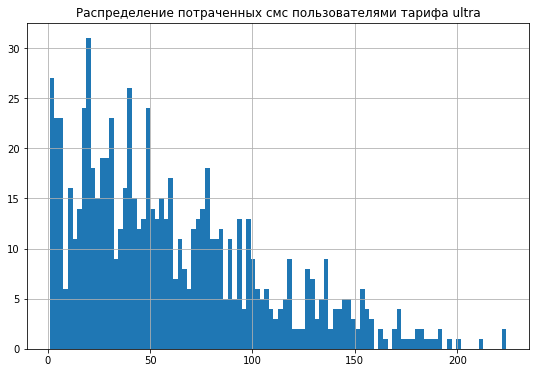

In [36]:
df_new_ultra['messages_id'].hist(bins = 100, figsize = (9, 6));
plt.title('Распределение потраченных смс пользователями тарифа ultra');
display(df_new_ultra['messages_id'].describe())
var_ultra_MESSAGES = np.var(df_new_ultra_nonull_DURATION['messages_id'], ddof=1)
print('Дисперсия количества потраченных смс пользователями с тарифом ultra после удаления выбросов:' , round(var_ultra_MESSAGES))

Для пользователей тарифа ultra доступно 1000 смс в месяц, но как можем увидеть из графика, такого количества смс не отправил ни один клиент ни в одном месяце. Максимальное количество смс, которое отправио клиент было 224 смс, а половина клиентов отправляет вообще не более 51 смс в месяц. Можем сделать вывод, что смс особым спросом не пользуются и у пользователей остается неиспользованной львиная доля того, за что они платят.

In [37]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


#### Анализ необходимого количества мегабайт для пользоваталей тарифа ultra

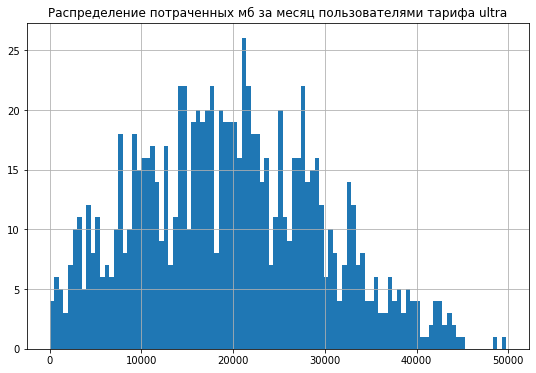

Количество значений больше 45000: 3


In [38]:
df_new_ultra['mb_used'].hist(bins = 100, figsize = (9, 6));
plt.title('Распределение потраченных мб за месяц пользователями тарифа ultra');
plt.show()
print('Количество значений больше 45000:', len(df_new_ultra['mb_used'][df_new_ultra['mb_used'] >= 45000]))

Дисперсия потраченных мб: 96591836


count      971.000000
mean     19620.177137
std       9828.114551
min        366.000000
25%      12020.500000
50%      19401.000000
75%      26867.000000
max      44341.000000
Name: mb_used, dtype: float64

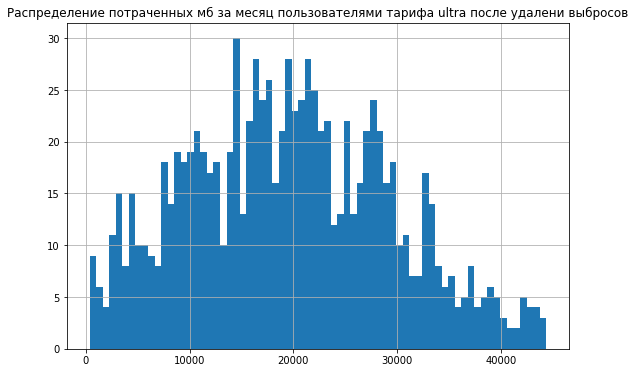

In [39]:
df_new_ultra_nonull_MB = df_new_ultra[(df_new_ultra['mb_used'] != 0)&(df_new_ultra['mb_used'] < 45000)]
var_ultra_MB = round(np.var(df_new_ultra_nonull_MB['mb_used'], ddof=1))
print('Дисперсия потраченных мб:', var_ultra_MB)

df_new_ultra_nonull_MB['mb_used'].hist(bins = 70, figsize = (9, 6));
plt.title('Распределение потраченных мб за месяц пользователями тарифа ultra после удалени выбросов');

display(df_new_ultra_nonull_MB['mb_used'].describe())

Посмотрим, сколько объектов, в которых потраченных мб в месяц больше, чем включено в тариф ultra (30720 мб).

In [40]:
display(df_new_ultra_nonull_MB[df_new_ultra_nonull_MB['mb_used'] > df_tariffs['mb_per_month_included'][1]].head())
print('Количество объектов, в которых превышен месячный лимит по интернету:', \
     (len(df_new_ultra_nonull_MB[df_new_ultra_nonull_MB['mb_used'] > df_tariffs['mb_per_month_included'][1]])))

,user_id,month,duration,calls_id,messages_id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,profit_per_sub
159,1024,11.0,1146.0,157.0,NaN,43146.0,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,43.0,6000.0
160,1024,12.0,949.0,136.0,NaN,35985.0,73,NaN,Санкт-Петербург,Иулиан,Антипов,2018-10-31,ultra,36.0,4950.0
311,1050,7.0,209.0,35.0,52.0,35205.0,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra,35.0,4800.0
383,1060,12.0,1233.0,184.0,52.0,43973.0,46,NaN,Калуга,Яков,Рудаков,2018-11-24,ultra,43.0,6000.0
783,1124,11.0,1127.0,160.0,95.0,36871.0,54,NaN,Махачкала,Альбин,Андрианов,2018-09-24,ultra,37.0,5100.0


Количество объектов, в которых превышен месячный лимит по интернету: 131


### Вывод
Что мы можем сказать проанализировав поведение наших пользователей за выбранный период:
1. Пользователи тарифа ультра стабильно не используют даже половины доступных смс и минут за месяц.
2. Очень активно используется интернет. 

Поскольку для бизнеса важно предлагать продукт, который будет максимально соответствовать требованиям клиента, то может встать вопрос: сколько требуется звонков, сообщений, интернета для клиентов тарифа, чтобы его пользование было выгодным для них?

Я бы определил выгодность тарифа для клиента, как цена которую клиент уплачивает за услугу данной телеком компании. Если клиент с тарифом смарт платит за месяц больше, чем мог бы платить за тариф ультра, то стоит сменить тариф. Если же клиент, находясь на тарифе ультра, в среднем использует кол-во минут, мб или смс, которое соответствует или чуть больше того, что предоставляет тариф смарт, то выгоднее перейти на него. 

Создадим функцию, которая будет определять, выгоден ли тариф, который в данный момент использует клиент или же ему стоит задуматься о смене тарифа.

In [41]:
def benefit(row):
    if row['tariff'] == 'smart':
        if row['profit_per_sub'] < ULTRA_COST:
            return 'Тариф выгоден'
        else:
            return 'Лучше сменить на ultra'
    if row['tariff'] == 'ultra':
        if row['duration'] > SMART_MINUTES or row['messages_id'] > SMART_MESSAGES or row['mb_used'] > SMART_INTERNET_MB:
            return 'Стоит рассмотреть тариф ultra'
        else:
            'Тариф выгоден'

            
df_new['benefit'] = df_new.apply(benefit, axis = 1)
df_new.head()

,user_id,month,duration,calls_id,messages_id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,profit_per_sub,benefit
0,1000,5.0,159.0,22.0,22.0,2256.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,3.0,1950.0,None
1,1000,6.0,172.0,43.0,60.0,23257.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,23.0,3000.0,Стоит рассмотреть тариф ultra
2,1000,7.0,340.0,47.0,75.0,14016.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1950.0,Стоит рассмотреть тариф ultra
3,1000,8.0,408.0,52.0,81.0,14070.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,14.0,1950.0,Стоит рассмотреть тариф ultra
4,1000,9.0,466.0,58.0,57.0,14581.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,15.0,1950.0,Стоит рассмотреть тариф ultra


Функция довольно простая по своей сути,  но тем не менее неплохо справляется с поставленной задачей: определить, выгоден ли тариф клиенту или нет. Также, функцию можно улучшить, поскольку делает вывод по основанию всего одного месяца. В идеале, такой совет должен даваться на основе дольшего периода (как минимум несколько месяцев) и большего количества информации.

### Анализ данных клиентов с тарифом Smart

In [42]:
df_new_SMART = df_new[df_new['tariff'] == 'smart']
df_new_SMART.nunique()

user_id            351
month               12
duration           732
calls_id           132
messages_id        123
mb_used           2104
age                 58
churn_date          20
city                72
first_name         212
last_name          313
reg_date           223
tariff               1
gb_used             39
profit_per_sub     709
benefit              2
dtype: int64

Тарифом smart из нашей выборки пользуется 351 клиент или 70,2%.

#### Анализ необходимого количества минут для пользоваталей тарифа smart

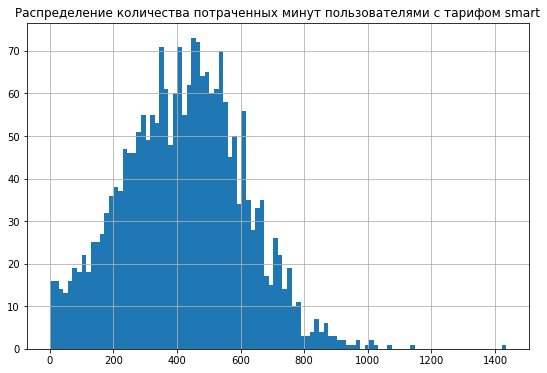

In [43]:
df_new_SMART['duration'].hist(bins = 100, figsize = (9, 6));
plt.title('Распределение количества потраченных минут пользователями с тарифом smart');

Основная масса звонков длится не более 1000 минут. Поэтому, все, что больше 1000 будем считать выбросами и не учитывать при анализе. Для начала посчтитаем, сколько у нас таких значений.

In [44]:
display(df_new_SMART[df_new_SMART['duration'] > 1000].head())
print('Количество значений больше 1000:', len(df_new_SMART[df_new_SMART['duration'] > 1000]))

,user_id,month,duration,calls_id,messages_id,mb_used,age,churn_date,city,first_name,last_name,reg_date,tariff,gb_used,profit_per_sub,benefit
1359,1216,12.0,1435.0,198.0,64.0,20095.0,74,NaN,Волгоград,Рустам,Малинин,2018-11-23,smart,20.0,4197.0,Лучше сменить на ultra
1452,1229,12.0,1022.0,128.0,6.0,25033.0,24,NaN,Москва,Нелли,Зубкова,2018-10-29,smart,25.0,3916.0,Лучше сменить на ultra
1622,1261,12.0,1074.0,141.0,22.0,32697.0,46,NaN,Казань,Мадина,Пантелеева,2018-10-30,smart,32.0,5472.0,Лучше сменить на ultra
1998,1319,10.0,1005.0,127.0,48.0,18011.0,70,NaN,Санкт-Петербург,Харитон,Парфенов,2018-08-24,smart,18.0,2465.0,Лучше сменить на ultra
2856,1451,12.0,1144.0,141.0,50.0,16971.0,58,NaN,Набережные Челны,Виктория,Завьялова,2018-08-27,smart,17.0,2682.0,Лучше сменить на ultra


Количество значений больше 1000: 6


count    2215.000000
mean      417.557562
std       185.580479
min         2.000000
25%       285.000000
50%       422.000000
75%       544.500000
max      1000.000000
Name: duration, dtype: float64

Дисперсия количества потраченных минут пользователями с тарифом smart после удаления выбросов: 34440


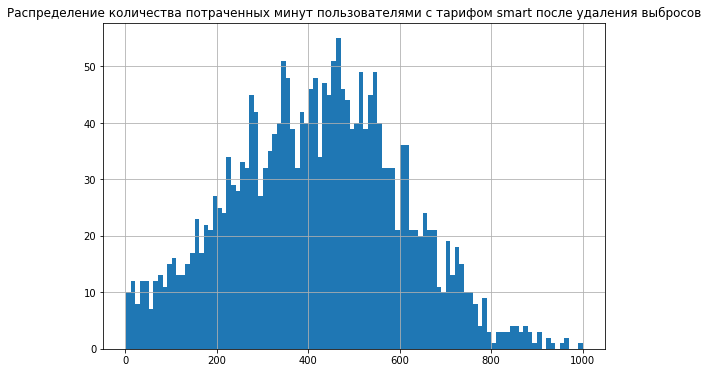

In [45]:
df_new_smart_nonull_DURATION = df_new_SMART[(df_new_SMART['duration'] != 0)&(df_new_SMART['duration'] <= 1000)]
df_new_smart_nonull_DURATION['duration'].hist(bins = 100, figsize = (9, 6));
plt.title('Распределение количества потраченных минут пользователями с тарифом smart после удаления выбросов');

display(df_new_smart_nonull_DURATION['duration'].describe())

print('Дисперсия количества потраченных минут пользователями с тарифом smart после удаления выбросов:' , round(np.var(df_new_smart_nonull_DURATION['duration'], ddof=1)))

На тарифе smart люди разговаривают в среднем 417 минут, медианное время 422 минуты.

#### Анализ необходимого количества СМС для пользоваталей тарифа smart

count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages_id, dtype: float64

Дисперсия количества потраченных смс пользователями с тарифом ultra после удаления выбросов: 720


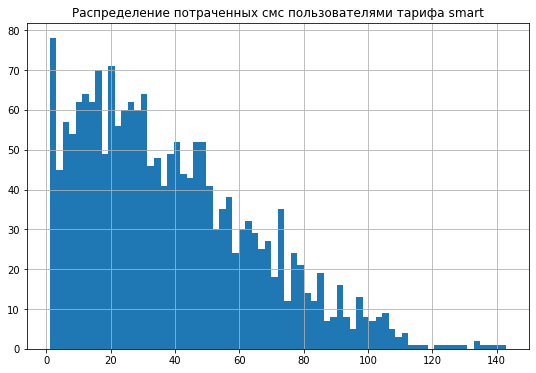

In [46]:
df_new_SMART['messages_id'].hist(bins = 70, figsize = (9, 6));
plt.title('Распределение потраченных смс пользователями тарифа smart');
display(df_new_SMART['messages_id'].describe())

var_smart_MESSAGES = np.var(df_new_smart_nonull_DURATION['messages_id'], ddof=1)

print('Дисперсия количества потраченных смс пользователями с тарифом ultra после удаления выбросов:' , round(var_smart_MESSAGES))

#### Анализ необходимого количества мегабайт для пользоваталей тарифа smart

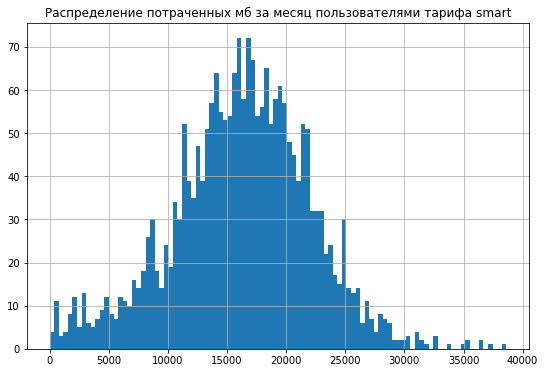

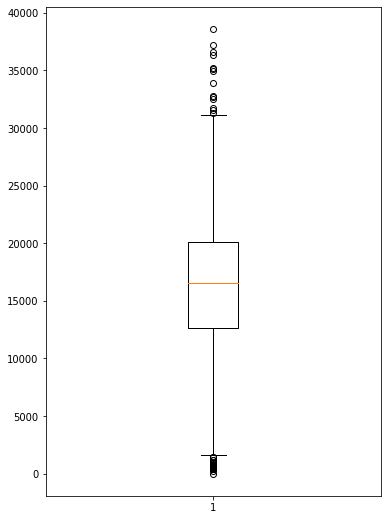

In [47]:
df_new_SMART['mb_used'].hist(bins = 100, figsize = (9, 6));
plt.title('Распределение потраченных мб за месяц пользователями тарифа smart');
plt.show()

no_na = df_new_SMART['mb_used'].dropna()
plt.figure(figsize = (6, 9))
box = plt.boxplot(x = no_na);

На глаз определить выбросы сложно, поэтому воспользуемся диаграммой размаха и посмотри на границы усов.

In [48]:
upper_whisker = [el.get_ydata()[1] for el in box['whiskers']][1]
upper_whisker

31115.0

Получили такую верхнюю границу. Отныне будем считать, что все, что лежит за пределами данной границы будет считаться выбросом.

In [49]:
df_new_SMART_no_fliers = df_new_SMART[df_new_SMART['mb_used'] >= 31115]
len(df_new_SMART[df_new_SMART['mb_used'] >= 31115])

15

Всего получилось 15 выбросов. Немного.

In [50]:
df_new_SMART_no_fliers = df_new_SMART[df_new_SMART['mb_used'] < 31115]

In [51]:
df_new_SMART_no_fliers['mb_used'].describe()

count     2213.000000
mean     16115.305016
std       5697.305673
min          0.000000
25%      12633.000000
50%      16484.000000
75%      20000.000000
max      31054.000000
Name: mb_used, dtype: float64

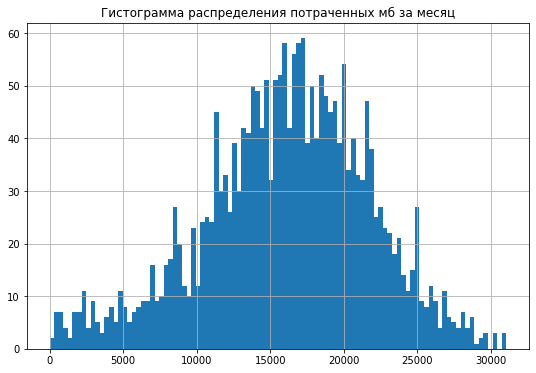

In [52]:
df_new_SMART_no_fliers['mb_used'].hist(bins = 100, figsize = (9, 6));
plt.title('Гистограмма распределения потраченных мб за месяц');

### Вывод
Исходя из проведенного анализа можно сделать следующие выводы:

1.Клиенты с тарифом ультра в среднем используют больше минут, 540 против 419 у smart

2.Клиенты с тарифом ультра в среднем используют больше смс, 62 против 39 у smart

3.Клиенты с тарифом ультра в среднем используют больше мб интернета, 19707 против 16244 у smart

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

In [53]:
df_new_ultra_PROFIT_mean = df_new_ultra['profit_per_sub'].mean()
print('Средний размер ежемесячного платежа у клиента с тарифом ultra составил:', round(df_new_ultra_PROFIT_mean), 'руб.')

df_new_smart_PROFIT_mean = df_new_SMART['profit_per_sub'].mean()
print('Средний размер ежемесячного платежа у клиента с тарифом ultra составил:', round(df_new_smart_PROFIT_mean), 'руб.')
print()

alpha = .05

results = st.ttest_ind(df_new_ultra['profit_per_sub'], df_new_SMART['profit_per_sub'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний размер ежемесячного платежа у клиента с тарифом ultra составил: 2845 руб.
Средний размер ежемесячного платежа у клиента с тарифом ultra составил: 1177 руб.

p-значение: 0.0
Отвергаем нулевую гипотезу


#### Вывод
Был проведен тест на проверку гипотезы о равенстве средних двух генеральных совокупностей, то есть равенство средней доходности между пользователями тарифа ultra и smart. P-критерий практически равен 0, что означает, что нулевая гипотеза (о равенстве средних двух генеральных совокупностей) отклоняется и средние не равны.

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [54]:
moscow_data = df_new[df_new['city'] == 'Москва']['profit_per_sub']
moscow_data_mean = df_new[df_new['city'] == 'Москва']['profit_per_sub'].mean() #1593
not_moscow_data = df_new[df_new['city'] != 'Москва']['profit_per_sub']
not_moscow_data_mean = df_new[df_new['city'] != 'Москва']['profit_per_sub'].mean() #1573

alpha = .05

results = st.ttest_ind(moscow_data, not_moscow_data)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
moscow_data_mean, not_moscow_data_mean

p-значение: 0.0005700353414778723
Отвергаем нулевую гипотезу


(1833.620294599018, 1654.3604606525912)

#### Вывод
Был проведен тест на проверку гипотезы о равенстве средней выручки между пользователями из Москвы и из других регионов(гипотеза о равенстве средних двух генеральных совокупностей). P-значение равно 0.59, что о говорит о том, что с вероятностью почти 60% можно получить данное или большее различие в средних случайно. Поэтому говорить о том, что данная разница значима не можем.

## Вывод


In [55]:
total_income_ultra = df_new_ultra['profit_per_sub'].sum()
print('Совокупный доход с клиентов с тарифом ultra составил:', total_income_ultra, 'руб.')

total_income_smart = df_new_SMART['profit_per_sub'].sum()
print('Совокупный доход с клиентов с тарифом smart составил:', total_income_smart, 'руб.')
print('')

df_new_ultra_clients = len(df_new_ultra['user_id'].unique()) #149 уникальных пользователей с тарифом ultra
print('Уникальных пользователей с тарифом ultra:', df_new_ultra_clients)

df_new_smart_clients = len(df_new_SMART['user_id'].unique()) #351 уникальный пользователь с тарифом smart
print('Уникальных пользователей с тарифом smart:', df_new_smart_clients)

Совокупный доход с клиентов с тарифом ultra составил: 2805450.0 руб.
Совокупный доход с клиентов с тарифом smart составил: 2624501.0 руб.

Уникальных пользователей с тарифом ultra: 149
Уникальных пользователей с тарифом smart: 351


- Клиенты с тарифом ультра в среднем используют больше минут, 539 против 417 у smart
- Клиенты с тарифом ультра в среднем используют больше смс, 61 против 39 у smart
- Клиенты с тарифом ультра в среднем используют больше мб интернета, 19620 против 16115 у smart
- Средняя выручка с клиентов с тарифом ultra 2845 рублей в меясяц
- Средняя выручка с клиентов с тарифом smart 1177 рублей в меясяц

Главной задачей ставилось проведение анализа поведения клиентов с различными тарифами с дальнейшим определением того, какой тариф лучше. Из проведенного анализа можно сделать следующие выводы:
1. Клиенты с тарифом ultra потребляют больше интернета, отправляют больше смс и дольше разговаривают по телефону, но при этом и средняя плата с таких клиентов выше. Клиентов с тарифом ultra меньше, чем клиентов с тарифом smart более, чем в 2 раза.
2. На основе проведенного тестировния гипотез можно утверждать, что:
    А) Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
    Б) Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
3. Сложно выделить какой - либо тариф, который был бы намного выгоднее другого. Предполагаю, что оба тарифа являются незаменимыми, поскольку рассчитаны на разные потребности людей. Те, кто активнее пользуются телефоном предпочитают платить больше и выбирают тариф ultra, те, кто телефоном пользуются меньше, выбирают smart, чтобы не переплачивать.